Accuracy: 100.00%
Test point (25, 32) is predicted as: Pikachu
Test point (24.2, 31.5) is predicted as: Pikachu
Test point (22, 34) is predicted as: Pikachu
Test point (20.5, 34) is predicted as: Pichu


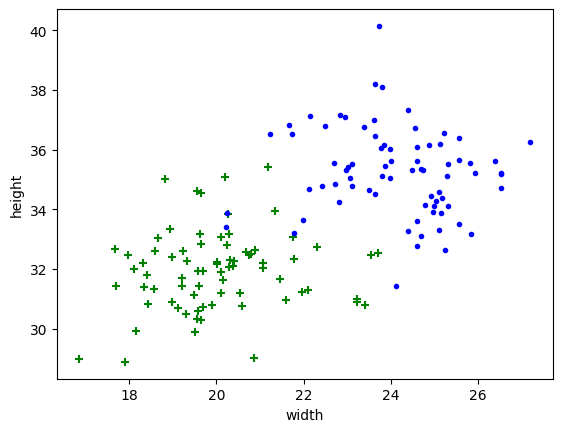

In [81]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# 1. Läser filen
train_data = pd.read_csv(r"C:\Code\Inlamning2-Pikachu\Data\datapoints.txt")

#döper om train_data till df
df = pd.DataFrame(train_data)

#städar listan på mellanslag och taps
train_data.columns = train_data.columns.str.strip()

#ÄNDRAR NAMN PÅ KOLUMMERNA
df.columns = ['width', 'height', 'label', 'nummer']


#SKRIVER UT ALLA PLOTTER SAMT DERAS COLUMNER
#print(df)


#SEPARERAR PÅ  på Pichu och Pikachu
df1 = df[df.label == 0]     # df1= Pichu
df2 = df[df.label == 1]     # df2= pikachu




#SKAPAR EN TABELL MED GRÖN PICHU OCH BLÅ FÖR PIKACHU 
plt.xlabel('width')
plt.ylabel('height')
plt.scatter(df1['width'],df1['height'], color ="green",marker ='+') #Pichu
plt.scatter(df2['width'],df2['height'], color ="blue",marker ='.') #Pikachu




############################################################################# TRÄNA DATAN

#DELAR UPP SÅ ATT X = width,height och Y = label
x = df[['width', 'height']]   # x skriver bara ut width and height
y = df['label']               # y skriver bara ut label (0 eller 1)

#tränar datan med hjälp av sklearn 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state= 10)



############################################################################ TESTA DATAN    



from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingClassifier

# Laddar filen och gör om den till pandas DataFrame
test_points = pd.read_csv(r'C:\Code\Inlamning2-Pikachu\Data\testpoints.txt')
df_test = pd.DataFrame(test_points)

#modellen jag anävnder
model = HistGradientBoostingClassifier()
model.fit(x, y)

y_pred = model.predict(x_test)


# Step 5: Evaluate the model
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Step 6: Test with new data points
test_points = [
    (25, 32),
    (24.2, 31.5),
    (22, 34),
    (20.5, 34)
]

# Convert test points to DataFrame
test_df = pd.DataFrame(test_points, columns=['width', 'height'])
predictions = model.predict(test_df)

# Step 7: Print predictions
for point, pred in zip(test_points, predictions):
    label = "Pichu" if pred == 0 else "Pikachu"
    print(f'Test point {point} is predicted as: {label}')


###############################################################################